In [1]:
#calcuting ekman pumping from wind stress
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#calcuting ekman pumping from wind stress
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math

In [2]:
7.6/np.sin(np.sin(abs(40)* np.pi / 180))

12.678731577767516

In [51]:
def coriolis_param(lat):
    day = (24*60*60)-(4*60)# this is 23hrs 56mins
    om = (2*np.pi)/day
    f = 2*om*np.sin(lat * np.pi / 180)
    return f
def ekman(taux, tauy):
    rho = 1026#kgm^-3
    f = coriolis_param(taux.lat)
    dtydx = tauy.differentiate('lon') / (110e3 * np.cos(tauy.lat * np.pi / 180))
    dtxdy = taux.differentiate('lat') / (110e3)
    ek = (1/(rho*f))*(dtydx-dtxdy)
    return ek
#ekman layer depth formualr from stewrat oceanogrpahy text
def eld(uwnd, vwnd):
    U10 = np.sqrt((uwnd**2) + (vwnd**2))
    DE = ( 7.6 / np.sqrt( np.sin(abs(uwnd.lat* np.pi / 180)))) * U10
    return DE


In [4]:
#GODAS TAU
#load in data
tauug= xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/uflx/*.nc').uflx.sel(lat=slice(-40,30),lon=slice(30,125))
tauvg= xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/vflx/*.nc').vflx.sel(lat=slice(-40,30),lon=slice(30,125))
#set land values to 0 
tauug = tauug.fillna(0)
tauvg = tauvg.fillna(0)

In [5]:
#ACCESS-CM2 tau
#load in data
tauua= xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauuo/*.nc').tauuo.sel(lat=slice(-40,30),lon=slice(30,125))
tauva= xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauvo/*.nc').tauvo.sel(lat=slice(-40,30),lon=slice(30,125))
#set land values to 0 
tauua = tauua.fillna(0)
tauva = tauva.fillna(0)

In [6]:
#calc ekman and climatology. also maks band of lat ###ACCESS
Weka = ekman(tauua, tauva)
Weka = Weka.groupby('time.month').mean('time')
Weka = Weka.where((Weka.lat<-5)|(Weka.lat>5), 0)

In [7]:
#calc ekman and climatology. also maks band of lat ###ACCESS
Wekg = ekman(tauug, tauvg)
Wekg = Wekg.groupby('time.month').mean('time')
Wekg = Wekg.where((Wekg.lat<-5)|(Wekg.lat>5), 0)

In [8]:
#now get difference of two and plot
WEKD = Weka - Wekg

In [9]:
#now plot climatology
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax
def plot_var(vari, vmin, vmax, name):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = 'RdBu_r', 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = 'RdBu_r', 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

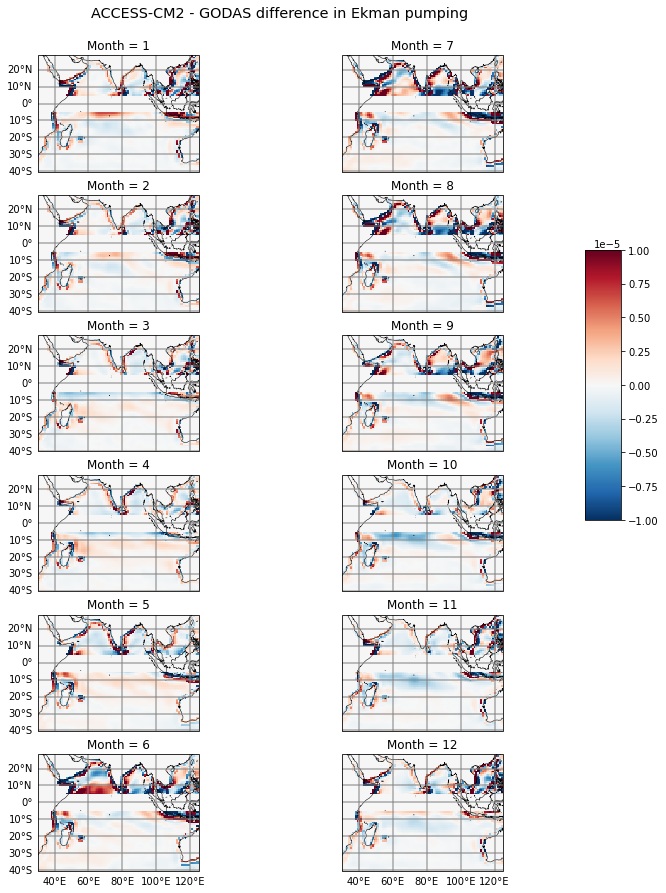

In [10]:
a = plot_var(WEKD, -1e-5, 1e-5, 'ACCESS-CM2 - GODAS difference in Ekman pumping')


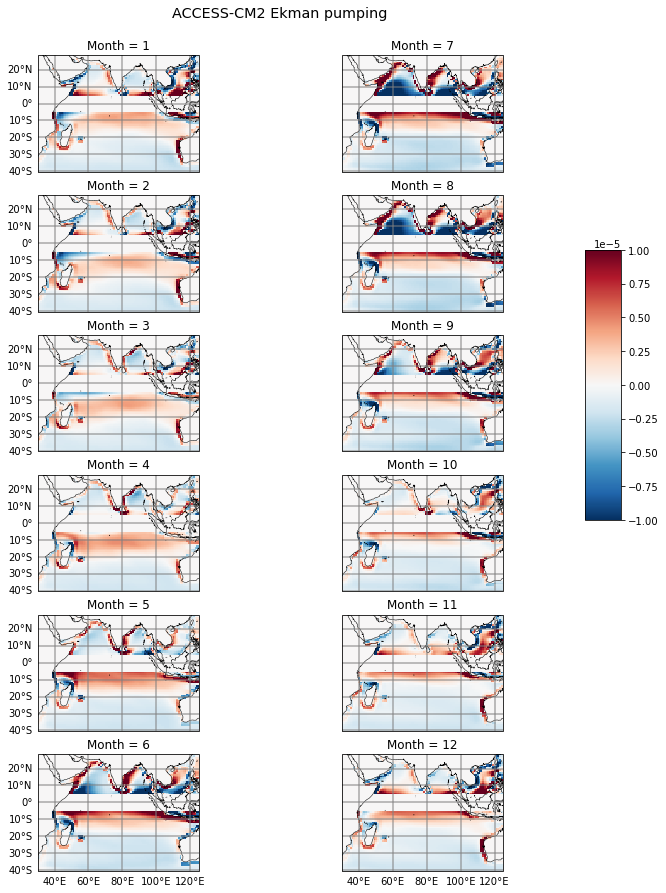

In [55]:
a = plot_var(Weka, -1e-5, 1e-5, 'ACCESS-CM2 Ekman pumping')


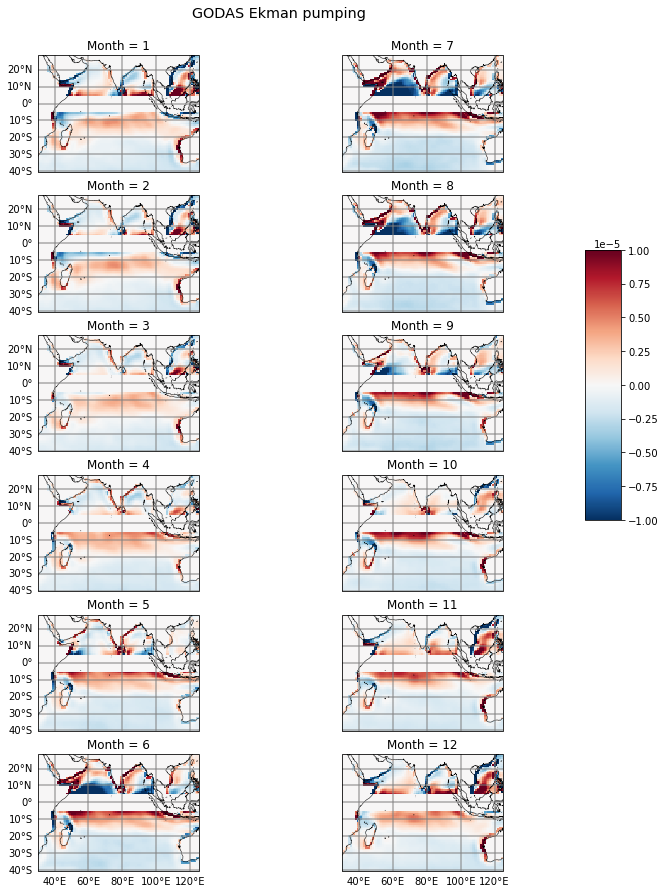

In [56]:
a = plot_var(Wekg, -1e-5, 1e-5, 'GODAS Ekman pumping')


In [11]:
#load in ACCESS data

In [12]:
#calculate w from continuity and look at difference
T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/THETAO/*.nc').thetao.sel(lat=slice(-40,30),lon=slice(30,125))
U = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/UO/*.nc').uo.sel(lat=slice(-40,30),lon=slice(30,125))
V = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/VO/*.nc').vo.sel(lat=slice(-40,30),lon=slice(30,125))
#W = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/WO/*.nc').wo.sel(lat=slice(-40,30),lon=slice(30,125))
Q = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/HFDS/*.nc').hfds.sel(lat=slice(-40,30),lon=slice(30,125))
#get only to 50m
T = T[:,:5]
U = U[:,:5]
V = V[:,:5]
#W = W[:,4]
#now put lat lon of uvw to T
#U = U.assign_coords({'lat': T.lat, 'lon': T.lon})
#V = V.assign_coords({'lat': T.lat, 'lon': T.lon})
U = U.fillna(0)
V = V.fillna(0)
#W = W.assign_coords({'lat': T.lat, 'lon': T.lon})
#rename lev coord to level
T = T.rename({'lev':'level'})
U = U.rename({'lev':'level'})
V = V.rename({'lev':'level'})

#first get dudx and dvdy
dudx = U.differentiate(coord = 'lon') / (110e3 * np.cos(U.lat * np.pi / 180))
dvdy = V.differentiate(coord='lat') / (110e3)


weights = U.level#add a 0m surface layer
wt=np.array([0.])
for i in range(len(weights.values)):
    NW = 2*weights.values[i]-wt[i]
    wt = np.insert(wt,i+1,NW)
thickness = wt[1:]-wt[:-1]
thickness_DA = xr.DataArray(thickness, coords={'level': U.level},
             dims=['level'])
w_list = []
print(thickness_DA.level)


for i, j in enumerate(thickness_DA):
    if i == 0:
        w = (dudx[:,i]*j + dvdy[:,i]*j)
        #add to new DataArray with vertical coords put in
        w = w.assign_coords({'level': thickness_DA.level[i]})
        w_list.append(w)
    else:
        l = (dudx[:,i]*j + dvdy[:,i]*j) + w_list[i-1]
        w = l.assign_coords({'level': thickness_DA.level[i]})
        w_list.append(w)
#now put all layers into one array
w = xr.concat(w_list, dim = 'level')
W = w
W = W[4,:]

W_ = W.groupby('time.month').mean('time')
W_ = W_.where((W_.lat<-5)|(W_.lat>5), 0)

<xarray.DataArray 'level' (level: 5)>
array([ 5., 15., 25., 35., 45.])
Coordinates:
  * level    (level) float64 5.0 15.0 25.0 35.0 45.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds


In [13]:
ac_dz = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdz.nc').sel(lat=slice(-40,30),lon=slice(30,125))


In [14]:
#laod in GODAS data

In [15]:
g_dz = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdz.nc').sel(lat=slice(-40,30),lon=slice(30,125))
g_w = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_wcur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
g_wm = g_w.where((g_w.lat<-5)|(g_w.lat>5), 0)

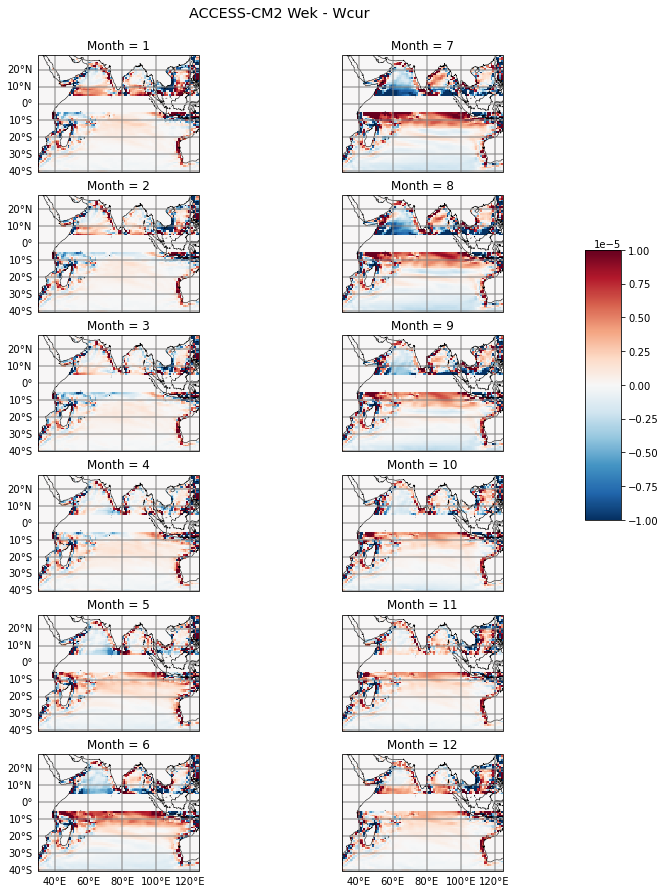

In [16]:
#now look at difference in access ek and vertical
a = plot_var((Weka - W_), -1e-5, 1e-5, 'ACCESS-CM2 Wek - Wcur')


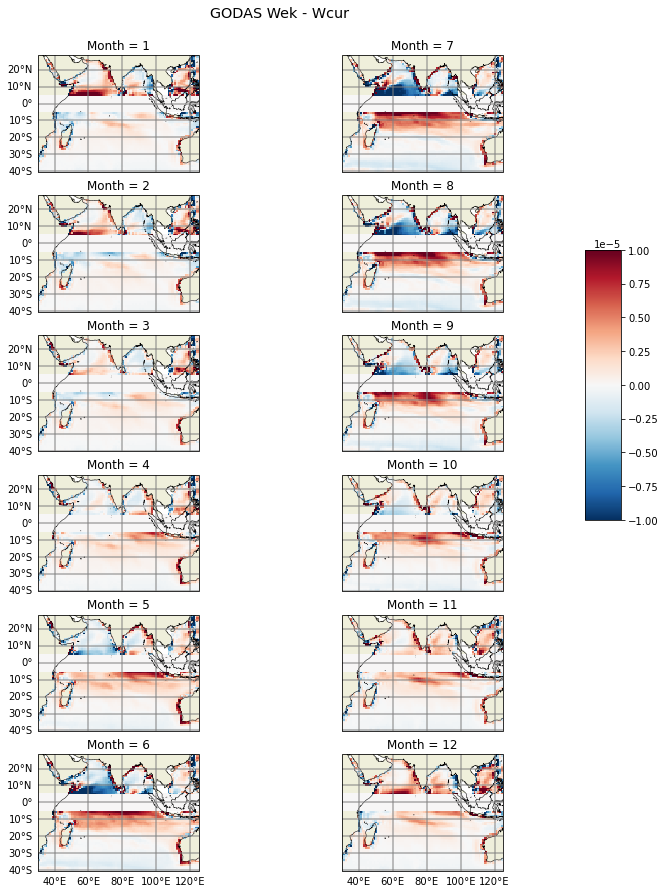

In [17]:
a = plot_var((Wekg - g_wm), -1e-5, 1e-5, 'GODAS Wek - Wcur')


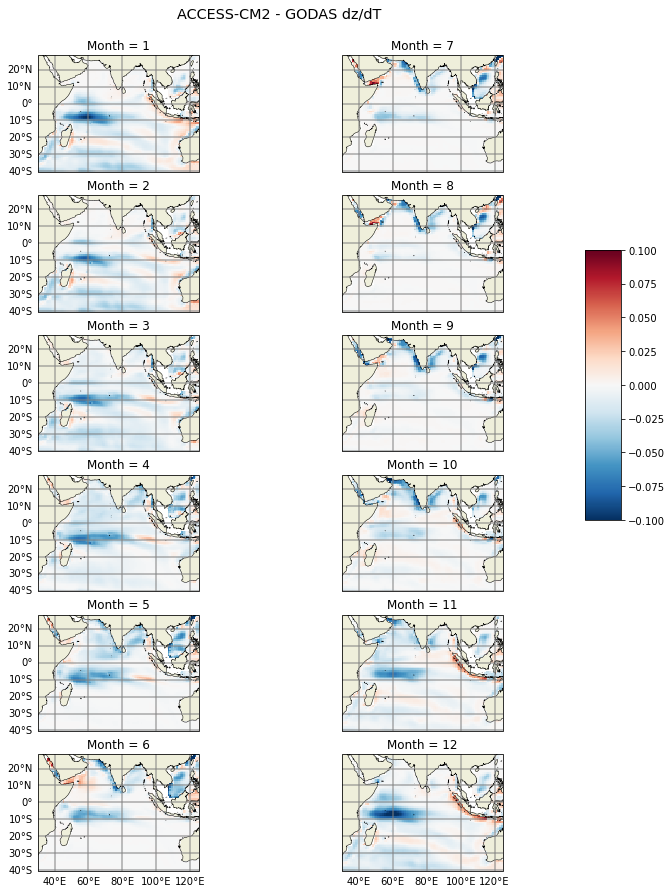

In [18]:
a = plot_var((ac_dz - g_dz), -1e-1, 1e-1, 'ACCESS-CM2 - GODAS dz/dT')


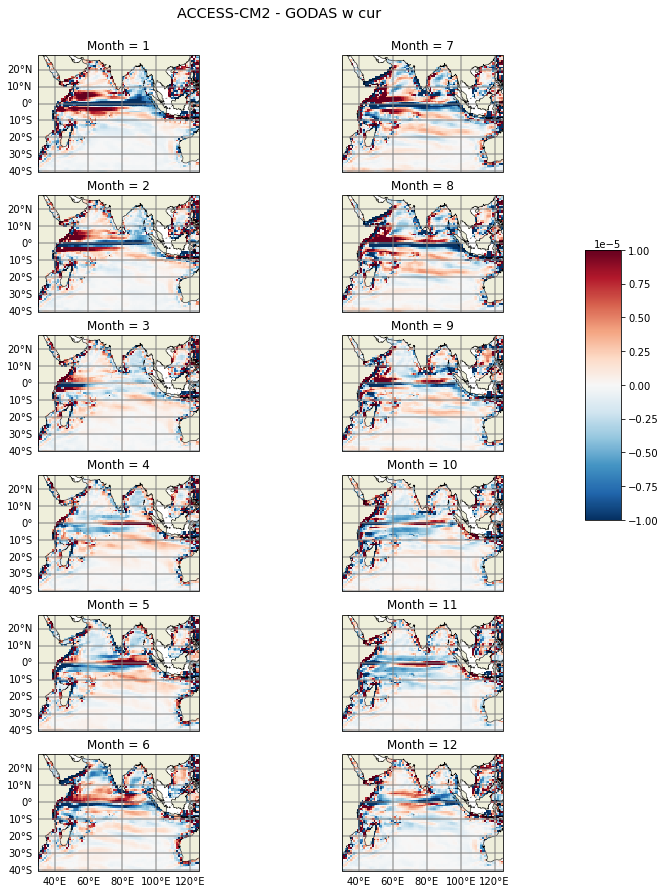

In [19]:
a = plot_var((W_ - g_w), -1e-5, 1e-5, 'ACCESS-CM2 - GODAS w cur')


In [47]:
#load in winds
a_u = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/UAS/*.nc').uas.sel(lat=slice(-40,30),lon=slice(30,125))
a_v = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/VAS/*.nc').vas.sel(lat=slice(-40,30),lon=slice(30,125))
g_u = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/uwnd.10m.mon.mean.nc').uwnd.sel(lat=slice(-40,30),lon=slice(30,125))
g_v = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/vwnd.10m.mon.mean.nc').vwnd.sel(lat=slice(-40,30),lon=slice(30,125))


In [21]:
a_u = a_u.groupby('time.month').mean('time')
a_v = a_v.groupby('time.month').mean('time')
g_u = g_u.groupby('time.month').mean('time')[:,0]
g_v = g_v.groupby('time.month').mean('time')[:,0]

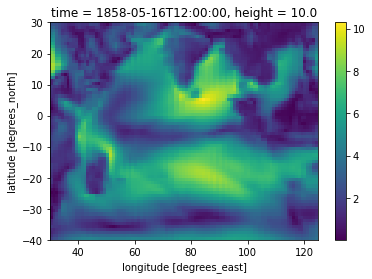

In [48]:
np.sqrt((a_u**2) + (a_v**2))[100].plot()

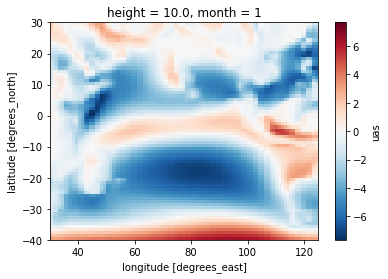

In [23]:
a_u[0].plot()

In [24]:
g_u

<xarray.DataArray 'uwnd' (month: 12, lat: 70, lon: 95)>
dask.array<getitem, shape=(12, 70, 95), dtype=float32, chunksize=(1, 70, 95), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 26.5 27.5 28.5 29.5
    level    float32 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

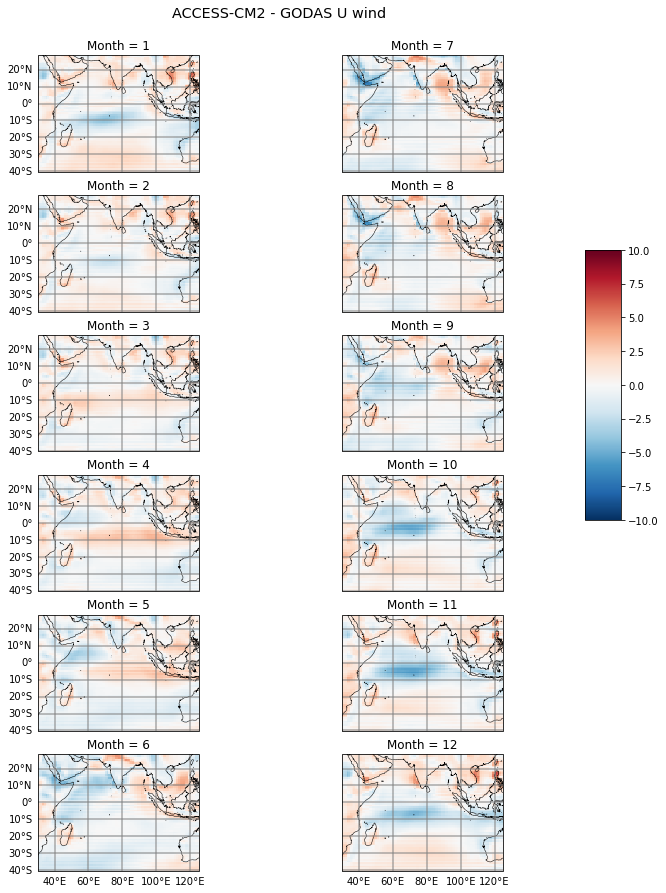

In [25]:
a = plot_var((a_u - g_u), -10, 10, 'ACCESS-CM2 - GODAS U wind')


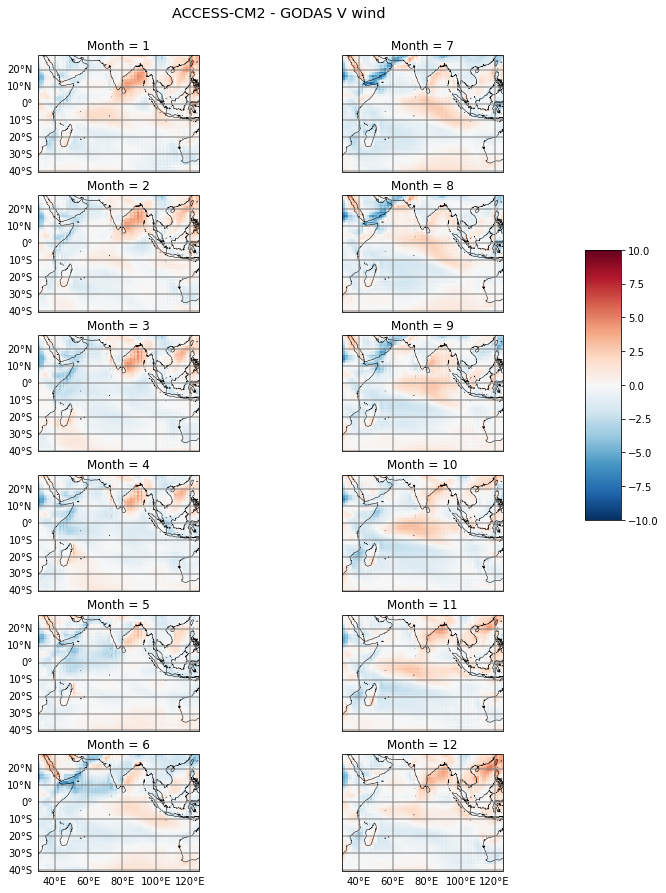

In [26]:
a = plot_var((a_v - g_v), -10, 10, 'ACCESS-CM2 - GODAS V wind')


In [27]:
def plot_var_c(vari, vmin, vmax, name, cm):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = cm, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = cm, 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

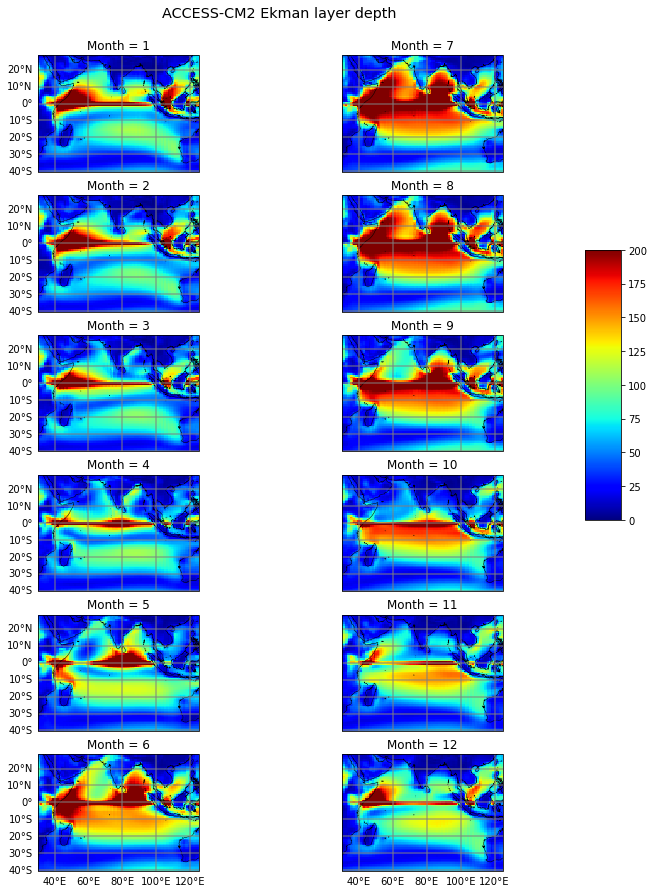

In [52]:
a = plot_var_c(eld(a_u, a_v).groupby('time.month').mean('time'), 0, 200, 'ACCESS-CM2 Ekman layer depth', 'jet')


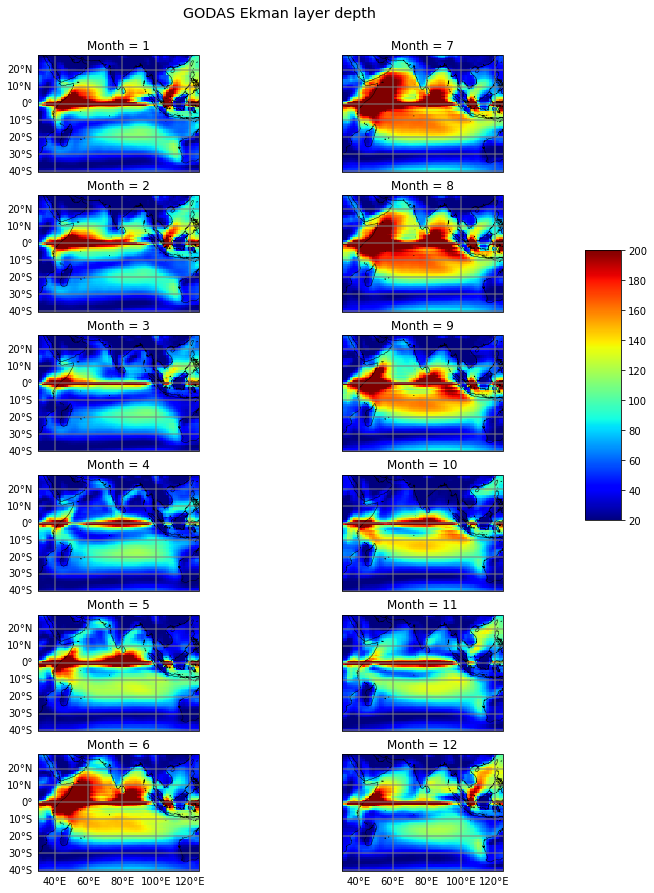

In [53]:
a = plot_var_c(eld(g_u[:,0], g_v[:,0]).groupby('time.month').mean('time'), 20, 200, 'GODAS Ekman layer depth', 'jet')


In [ ]:
g_u[:,0]

In [39]:
#load in thermoclien data
A_TC = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_THMC.nc').level.sel(lat=slice(-40,30),lon=slice(30,125))

G_TC = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/THMC.nc').level.sel(lat=slice(-40,30),lon=slice(30,125))


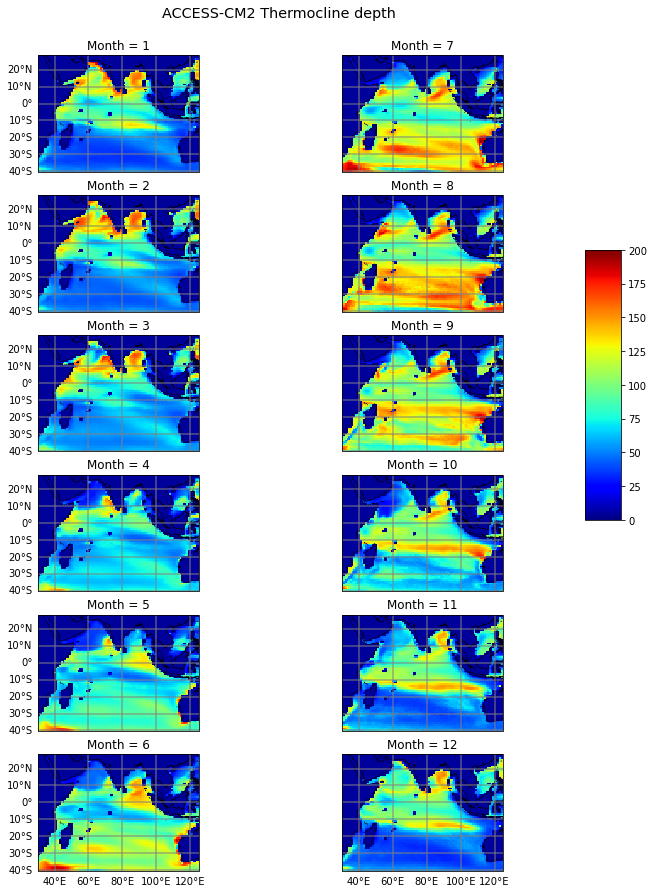

In [40]:
a = plot_var_c(A_TC, 0, 200, 'ACCESS-CM2 Thermocline depth', 'jet')


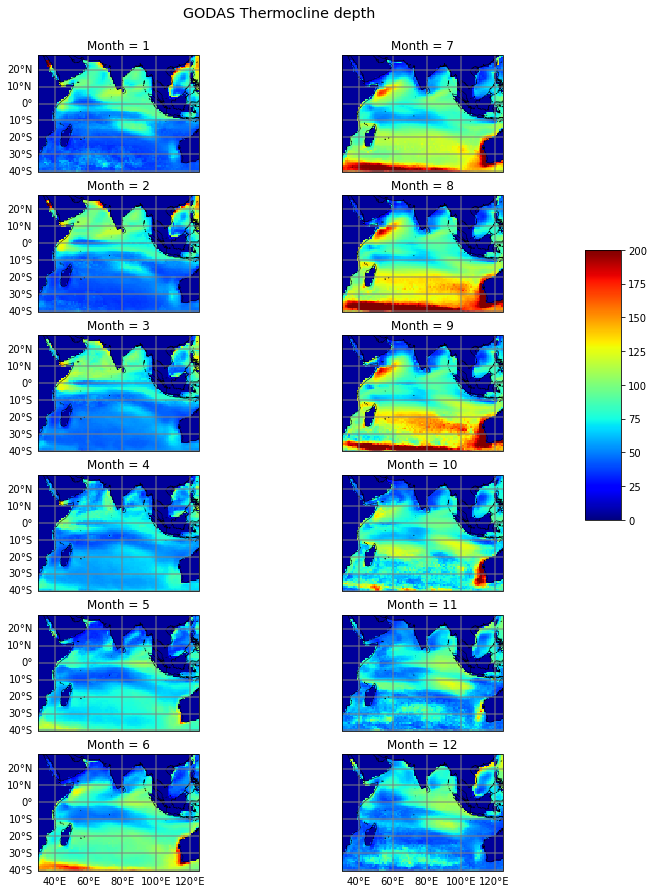

In [54]:
a = plot_var_c(G_TC, 0, 200, 'GODAS Thermocline depth', 'jet')


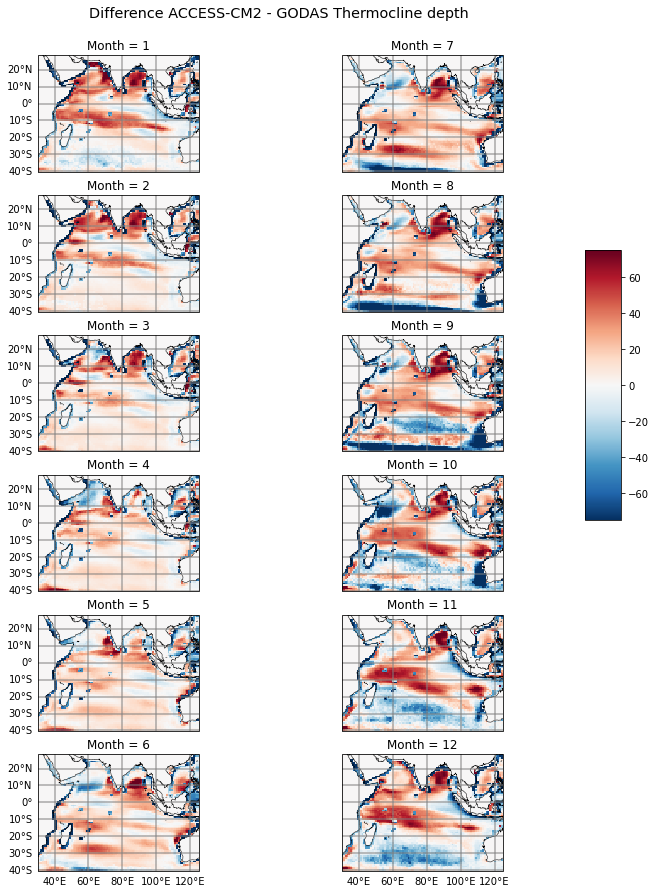

In [46]:
a = plot_var_c((A_TC-G_TC), -75, 75, 'Difference ACCESS-CM2 - GODAS Thermocline depth', 'RdBu_r')
